**Hypothesis(0):** Coastal cities receive more precipitation than noncoastal cities.

**Hypothesis:** Coastal cities do not receive more precipitation than noncoastal cities.

**Cosatal cities:** Port Aransas, Galveston
**Noncoastal cities:** Houston, Dallas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#read the CSV files
precp_aransas=pd.read_csv('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/PrtAransas - terraclimate_27.8312N_97.0641W_PrtAransas.csv')
precp_glaveston=pd.read_csv('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/Glavestone - terraclimate_29.2932N_94.8002W_Glavestone.csv')
precp_houston=pd.read_csv('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/Houston - terraclimate_29.7106N_95.3662W_Houston.csv')
precp_dallas=pd.read_csv('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/Dallas_terraclimate_32.7877N_96.8685W.csv')

In [13]:
precp_aransas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       60 non-null     int64  
 1   Month      60 non-null     int64  
 2   ppt_in     60 non-null     float64
 3   tmax_degF  60 non-null     float64
 4   soil_in    60 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.5 KB


In [14]:
precp_aransas.head()

,Year,Month,ppt_in,tmax_degF,soil_in
0,2019,1,1.99,65.30,3.49
1,2019,2,1.24,69.26,3.03
2,2019,3,0.79,71.96,1.85
3,2019,4,1.95,77.90,1.31
4,2019,5,5.30,84.92,1.23


In [15]:
# Exclude extra columns
precp_aransas=precp_aransas[['Year','Month','ppt_in']]
precp_glaveston=precp_glaveston[['Year','Month','ppt_in']]
precp_houston=precp_houston[['Year','Month','ppt_in']]
precp_dallas=precp_dallas[['Year','Month','ppt_in']]

In [16]:
# Create a 'Date' column by combining 'Year' and 'Month', assuming 'Month' is a number from 1 to 12
precp_aransas['Date'] = pd.to_datetime(precp_aransas[['Year', 'Month']].assign(DAY=1))
precp_glaveston['Date'] = pd.to_datetime(precp_glaveston[['Year', 'Month']].assign(DAY=1))
precp_houston['Date'] = pd.to_datetime(precp_houston[['Year', 'Month']].assign(DAY=1))
precp_dallas['Date'] = pd.to_datetime(precp_dallas[['Year', 'Month']].assign(DAY=1))

# Set 'Date' as the index
precp_aransas.set_index('Date', inplace=True)
precp_glaveston.set_index('Date', inplace=True)
precp_houston.set_index('Date', inplace=True)
precp_dallas.set_index('Date', inplace=True)

In [17]:
precp_aransas.head()

,Year,Month,ppt_in
Date,,,
2019-01-01,2019,1,1.99
2019-02-01,2019,2,1.24
2019-03-01,2019,3,0.79
2019-04-01,2019,4,1.95
2019-05-01,2019,5,5.30


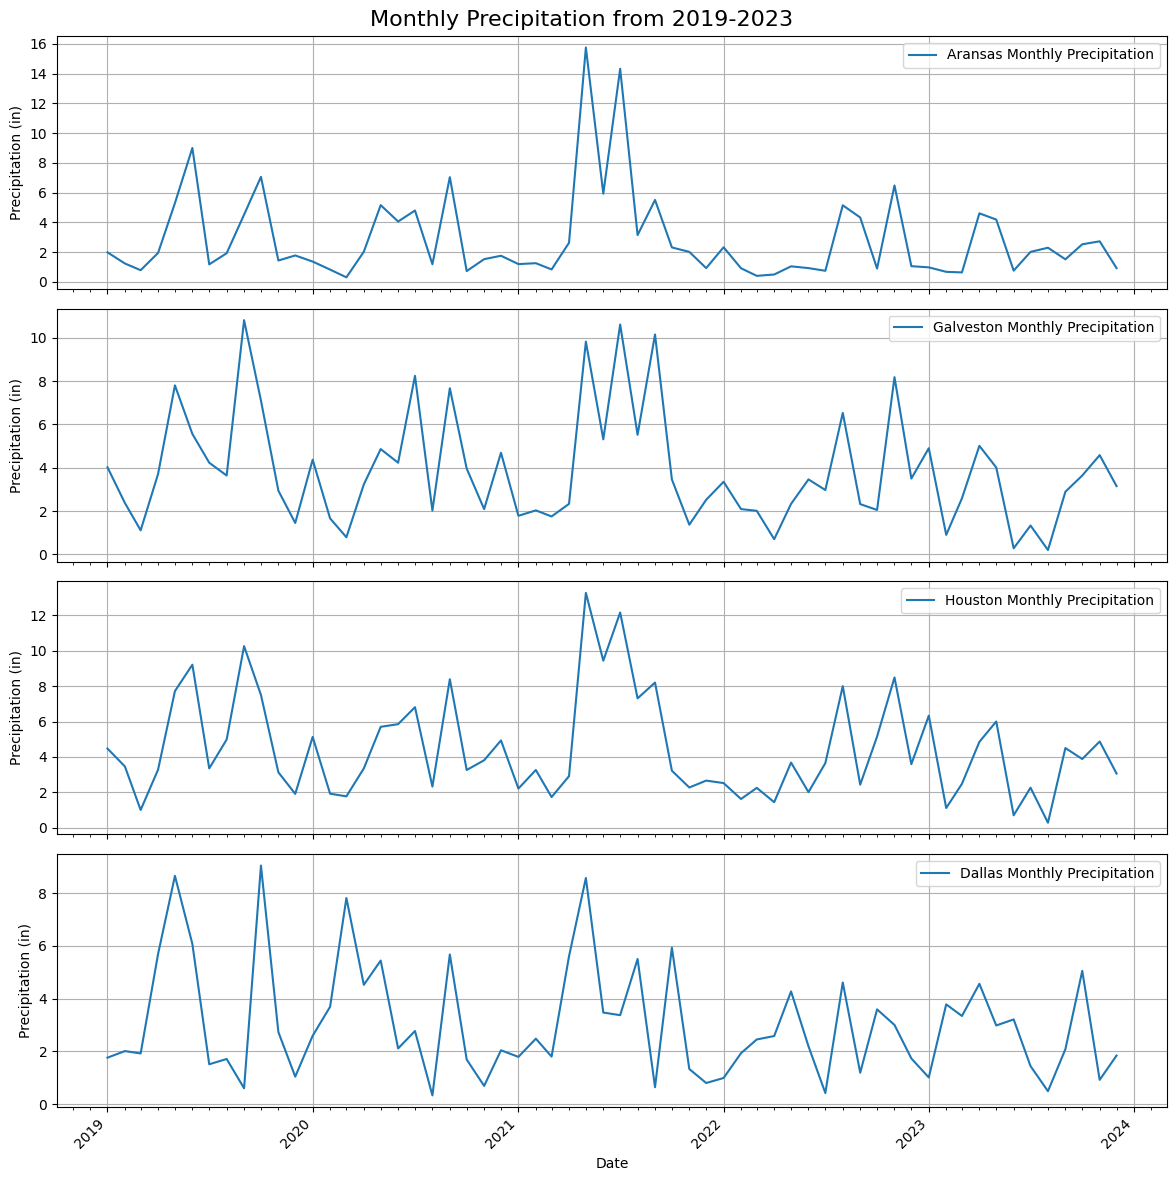

In [21]:
import matplotlib.dates as mdates


#  plot the data for each city
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Define the date range for the x-axis
date_range = pd.date_range(start="2019-01-01", end="2023-12-31", freq='M')

# Define a plotting function
def plot_city_precipitation(ax, city_data, city_name):
    ax.plot(city_data.index, city_data['ppt_in'], label=f'{city_name} Monthly Precipitation')
    ax.set_ylabel('Precipitation (in)')
    ax.legend()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.grid(True)

# Plot each city's precipitation data
plot_city_precipitation(axes[0], precp_aransas, 'Aransas')
plot_city_precipitation(axes[1], precp_glaveston, 'Galveston')
plot_city_precipitation(axes[2], precp_houston, 'Houston')
plot_city_precipitation(axes[3], precp_dallas, 'Dallas')

# Rotate and align the tick labels
plt.setp(axes[-1].get_xticklabels(), rotation=45, ha='right')

# Set a common x-label
axes[-1].set_xlabel('Date')

# Add a title for the whole plot
fig.suptitle('Monthly Precipitation from 2019-2023', fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()


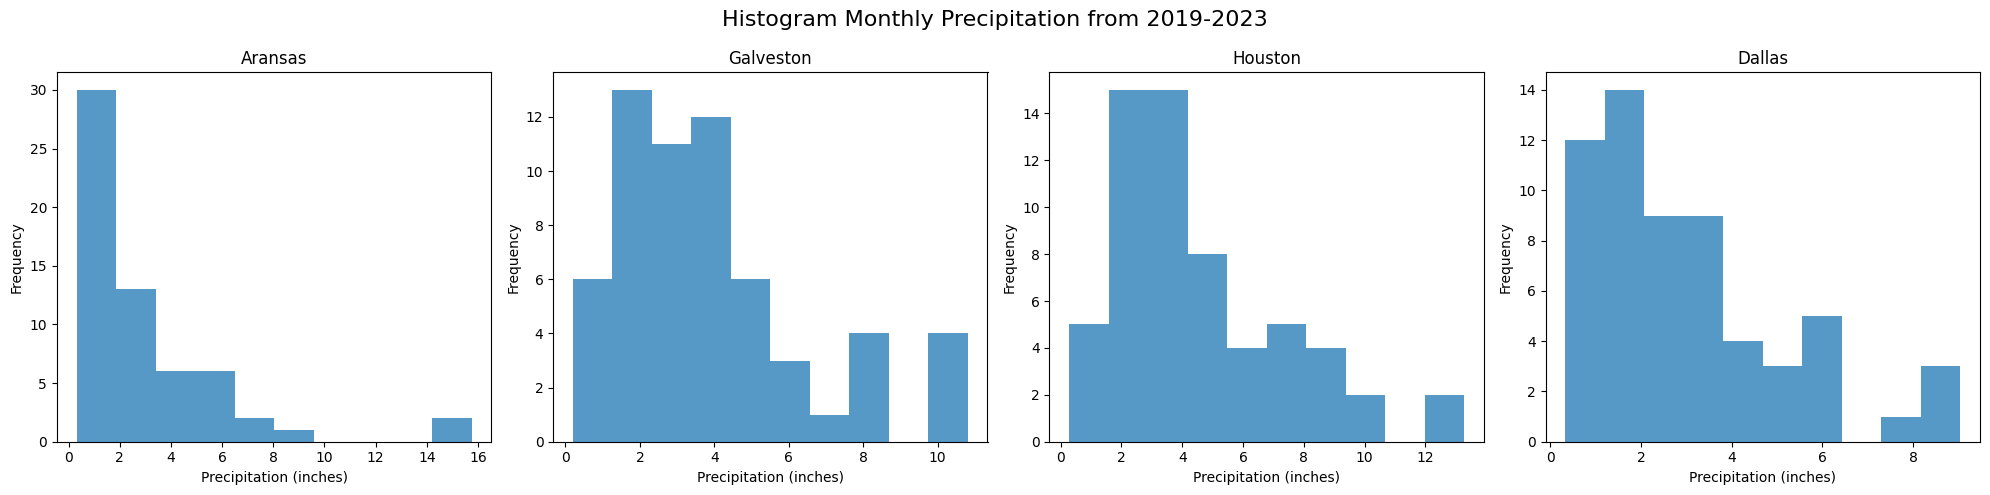

In [23]:
# Assuming my data frames are named correctly as mentioned
data_frames = {
    #'Corpus Christi': precp_corpus,
    'Aransas': precp_aransas,
    'Galveston': precp_glaveston,
    'Houston': precp_houston,
    #'Austin': precp_austin,
    'Dallas': precp_dallas
}

# Setting up the figure and axes for the histograms
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust the figsize as needed

# Flatten the axes array to iterate over it correctly
axes_flat = axes.flatten()

# Loop through the data frames and plot histograms on the flattened axes
for ax, (city, df) in zip(axes_flat, data_frames.items()):
    ax.hist(df['ppt_in'], bins=10, alpha=0.75)  # Adjust the number of bins as needed
    ax.set_title(city)
    ax.set_xlabel('Precipitation (inches)')
    ax.set_ylabel('Frequency')

# Add a title for the whole plot
fig.suptitle('Histogram Monthly Precipitation from 2019-2023', fontsize=16)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [20]:
from scipy.stats import shapiro
#Let's test the normality of data

# Data frames for each city
data_frames = {

    'Dallas': precp_dallas,
    'Aransas': precp_aransas,
    'Galveston': precp_glaveston,
    'Houston': precp_houston

}

# Perform Shapiro-Wilk test for normality on the ppt_in column for each city
shapiro_results = {}

for city, df in data_frames.items():
    stat, p = shapiro(df['ppt_in'])
    shapiro_results[city] = (stat, p)
    print(f"{city}:\nShapiro-Wilk Test Statistic = {stat}, p-value = {p}\n")

# Inspecting the results
for city, (stat, p) in shapiro_results.items():
    if p > 0.05:
        print(f"The precipitation data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The precipitation data for {city} does not appear to be normally distributed (reject H0).")


Dallas:
Shapiro-Wilk Test Statistic = 0.8965516090393066, p-value = 9.872051305137575e-05

Aransas:
Shapiro-Wilk Test Statistic = 0.7188873291015625, p-value = 2.0882113815900993e-09

Galveston:
Shapiro-Wilk Test Statistic = 0.9012446403503418, p-value = 0.0001460563507862389

Houston:
Shapiro-Wilk Test Statistic = 0.9104131460189819, p-value = 0.0003222348168492317

The precipitation data for Dallas does not appear to be normally distributed (reject H0).
The precipitation data for Aransas does not appear to be normally distributed (reject H0).
The precipitation data for Galveston does not appear to be normally distributed (reject H0).
The precipitation data for Houston does not appear to be normally distributed (reject H0).


The **Shapiro-Wilk** test is used to assess the normality of a dataset. The null hypothesis (H0) for this test posits that the data is normally distributed. A low p-value (typically < 0.05) suggests that you can reject the null hypothesis, indicating the data does not follow a normal distribution.

 The precipitation data for all four cities—**Dallas, Aransas, Galveston, and Houston**—do not appear to be normally distributed based on the Shapiro-Wilk test results. The initial p-values for each city are well below the typical threshold of 0.05, leading to the rejection of the null hypothesis in each case.

The histograms and this result, suggest that do **transformation** on data. There are two choise: **log** or **sqrt**. Let's check both.

In [36]:
from scipy.stats import shapiro

# Data frames for each city
data_frames = {
    'Dallas': precp_dallas,
    'Aransas': precp_aransas,
    'Galveston': precp_glaveston,
    'Houston': precp_houston

}

# Function to safely compute the logarithm (adding a small constant to avoid log(0))
def safe_log(x, minval=0.01):
    return np.log(x + minval)

# Perform Shapiro-Wilk test for normality on the log and sqrt of ppt_in column for each city
shapiro_results_log = {}
shapiro_results_sqrt = {}

for city, df in data_frames.items():
    # Log transformation (assuming ppt_in > 0)
    df['ppt_in_log'] = safe_log(df['ppt_in'])
    stat_log, p_log = shapiro(df['ppt_in_log'])
    shapiro_results_log[city] = (stat_log, p_log)

    # Sqrt transformation
    df['ppt_in_sqrt'] = np.sqrt(df['ppt_in'])
    stat_sqrt, p_sqrt = shapiro(df['ppt_in_sqrt'])
    shapiro_results_sqrt[city] = (stat_sqrt, p_sqrt)

    print(f"{city} Log:\nShapiro-Wilk Test Statistic = {stat_log:.3f}, p-value = {p_log}")
    print(f"{city} Sqrt:\nShapiro-Wilk Test Statistic = {stat_sqrt:.3f}, p-value = {p_sqrt}\n")

# Inspecting the results for log transformation
print("Log Transformation Results:")
for city, (stat, p) in shapiro_results_log.items():
    if p > 0.05:
        print(f"The log-transformed precipitation data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The log-transformed precipitation data for {city} does not appear to be normally distributed (reject H0).")

# Inspecting the results for sqrt transformation
print("\nSqrt Transformation Results:")
for city, (stat, p) in shapiro_results_sqrt.items():
    if p > 0.05:
        print(f"The sqrt-transformed precipitation data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The sqrt-transformed precipitation data for {city} does not appear to be normally distributed (reject H0).")


Dallas Log:
Shapiro-Wilk Test Statistic = 0.976, p-value = 0.26881882548332214
Dallas Sqrt:
Shapiro-Wilk Test Statistic = 0.971, p-value = 0.17102618515491486

Aransas Log:
Shapiro-Wilk Test Statistic = 0.974, p-value = 0.23508818447589874
Aransas Sqrt:
Shapiro-Wilk Test Statistic = 0.882, p-value = 3.0407509257202037e-05

Galveston Log:
Shapiro-Wilk Test Statistic = 0.939, p-value = 0.005085339769721031
Galveston Sqrt:
Shapiro-Wilk Test Statistic = 0.979, p-value = 0.3946780562400818

Houston Log:
Shapiro-Wilk Test Statistic = 0.963, p-value = 0.06295744329690933
Houston Sqrt:
Shapiro-Wilk Test Statistic = 0.980, p-value = 0.44626927375793457

Log Transformation Results:
The log-transformed precipitation data for Dallas seems to be normally distributed (fail to reject H0).
The log-transformed precipitation data for Aransas seems to be normally distributed (fail to reject H0).
The log-transformed precipitation data for Galveston does not appear to be normally distributed (reject H0).
T

Based on the **Shapiro-Wilk** test results for both log and square root (sqrt) transformations of precipitation data across four cities, here's some options, we can apply either log or sqrt for each city.

**Dallas** and **Aransas** benefit more from **log** transformations with regards to conforming to a normal distribution.
**Galveston** and **Houston** show better normality with **sqrt** transformations.

The choice of transformation can significantly affect the statistical properties of our data, and the best choice depends on the specific distribution of the original data.

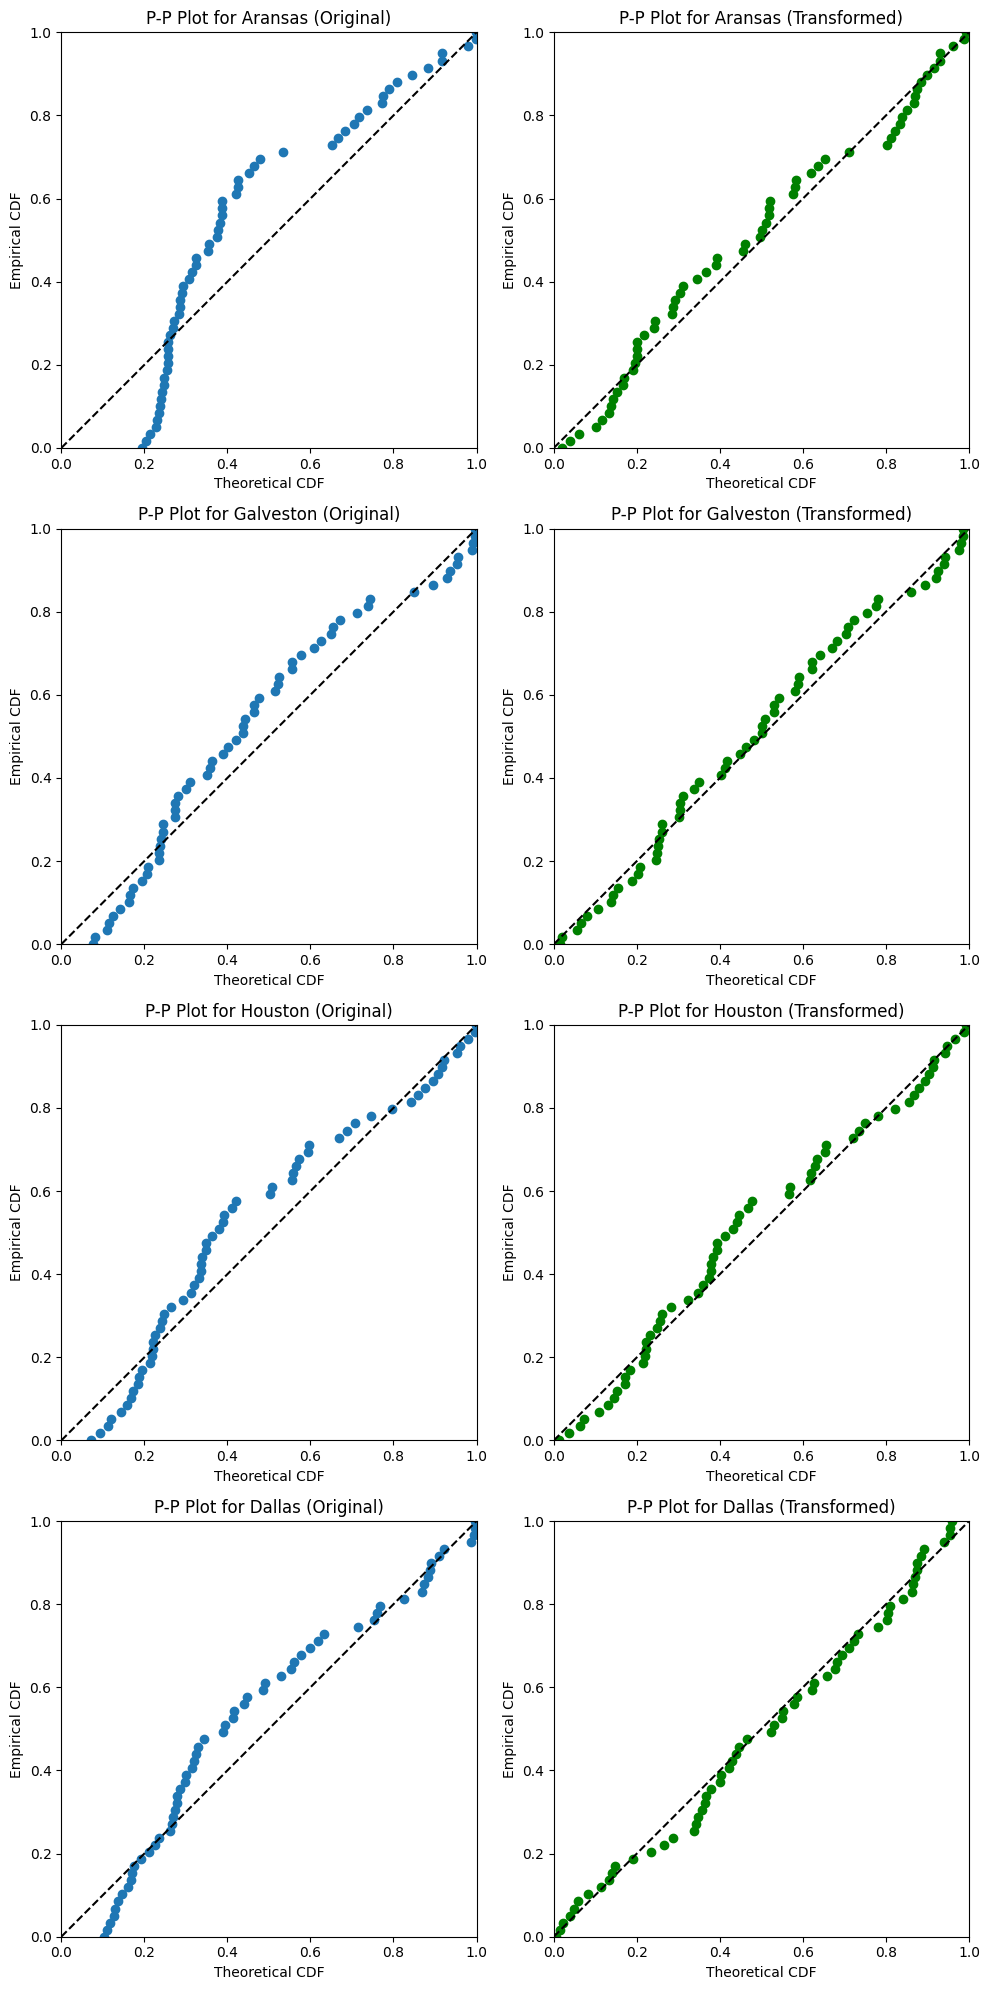

In [28]:
from scipy import stats

# Define my original and transformed data
original_data = {
    'Aransas': precp_aransas['ppt_in'],
    'Galveston': precp_glaveston['ppt_in'],
    'Houston': precp_houston['ppt_in'],
    'Dallas': precp_dallas['ppt_in']
}

transformed_data = {
    'Aransas': np.log(precp_aransas['ppt_in'] + 0.01),  # Log transformation
    'Galveston': np.sqrt(precp_glaveston['ppt_in']),   # Sqrt transformation
    'Houston': np.sqrt(precp_houston['ppt_in']),        # Sqrt transformation
    'Dallas': np.log(precp_dallas['ppt_in'] + 0.01)     # Log transformation
}

# Set up the plot with 4x2 subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 20))  # Adjust the figsize as needed

for i, city in enumerate(original_data.keys()):
    # Non-transformed data P-P plot
    ax1 = axes[i, 0]
    percentiles = np.linspace(0, 100, num=len(original_data[city]))
    x = np.percentile(original_data[city], percentiles)
    cdf = stats.norm.cdf(x, loc=np.mean(original_data[city]), scale=np.std(original_data[city]))
    ecdf = percentiles / 100.0
    ax1.plot(cdf, ecdf, marker='o', linestyle='none', markersize=6)
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('Theoretical CDF')
    ax1.set_ylabel('Empirical CDF')
    ax1.set_title(f'P-P Plot for {city} (Original)')
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    # Transformed data P-P plot
    ax2 = axes[i, 1]
    percentiles = np.linspace(0, 100, num=len(transformed_data[city]))
    x = np.percentile(transformed_data[city], percentiles)
    cdf = stats.norm.cdf(x, loc=np.mean(transformed_data[city]), scale=np.std(transformed_data[city]))
    ecdf = percentiles / 100.0
    ax2.plot(cdf, ecdf, marker='o', linestyle='none', markersize=6,color='green')
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.set_xlabel('Theoretical CDF')
    ax2.set_ylabel('Empirical CDF')
    ax2.set_title(f'P-P Plot for {city} (Transformed)')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In a **P-P plot**, if the points closely follow the diagonal line (which represents the theoretical **normal distribution**), it suggests that the data conforms well to a normal distribution.

For all cities, the transformed data shows a **better** fit to the normal distribution compared to the original data, as evidenced by the closeness of the points to the diagonal line in the **P-P plots**.

Before conducting **ANOVA**, I want to test the assumption of equal variances across groups. **Levene's** test can be used to assess the homogeneity of variances, which is a crucial assumption for **ANOVA**.

In [35]:
from scipy import stats


# Apply the log transformation where appropriate
precp_aransas['ppt_in_log'] = np.log(precp_aransas['ppt_in'] + 0.01)  # Adding a small constant to avoid log(0)
precp_dallas['ppt_in_log'] = np.log(precp_dallas['ppt_in'] + 0.01)

# Apply the sqrt transformation where appropriate
precp_glaveston['ppt_in_sqrt'] = np.sqrt(precp_glaveston['ppt_in'])
precp_houston['ppt_in_sqrt'] = np.sqrt(precp_houston['ppt_in'])

# Conduct Levene's test for equality of variances
stat, p = stats.levene(
    precp_aransas['ppt_in_log'],
    precp_glaveston['ppt_in_sqrt'],
    precp_houston['ppt_in_sqrt'],
    precp_dallas['ppt_in_log']
)

print(f"Levene's test statistic: {stat:.3f}, p-value: {p:.3f}")


Levene's test statistic: 2.827, p-value: 0.039


The results from **Levene's** test, with a test statistic of approximately 2.83 and a p-value of approximately 0.0393, indicate that the variances of the transformed precipitation data across the four cities (Aransas, Galveston, Houston, and Dallas) are **significantly different** at the common alpha level of 0.05.

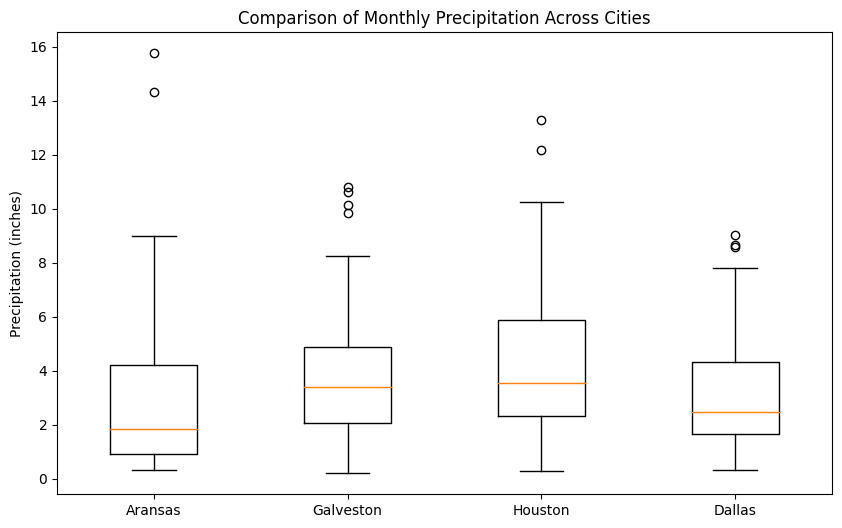

In [30]:

# Assuming my data frames are set up correctly and 'ppt_in' is the column of interest
data_to_plot = [precp_aransas['ppt_in'], precp_glaveston['ppt_in'], precp_houston['ppt_in'], precp_dallas['ppt_in']]
cities = ['Aransas', 'Galveston', 'Houston', 'Dallas']

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplot
ax.boxplot(data_to_plot)

# Add city names as x-axis labels
ax.set_xticklabels(cities)

# Set the labels and title
ax.set_ylabel('Precipitation (inches)')
ax.set_title('Comparison of Monthly Precipitation Across Cities')

# Display the plot
plt.show()


From this box plot, you can infer that there's variability in monthly precipitation both within and between these cities. **Galveston** and **Houston** appear to have higher median precipitation and variability compared to Aransas and Dallas, which may be indicative of regional climatic patterns.

The presence of **outliers** suggests that some months had significantly higher precipitation, which could be due to **extreme weather events** like **storms** or **hurricanes**.

In [37]:
from scipy.stats import f_oneway

# ANOVA test on the transformed data
f_stat, p_value = f_oneway(
    precp_aransas['ppt_in_log'],
    precp_glaveston['ppt_in_sqrt'],
    precp_houston['ppt_in_sqrt'],
    precp_dallas['ppt_in_log']
)

print(f"ANOVA test results - F-statistic: {f_stat:.3f}, p-value: {p_value}")


ANOVA test results - F-statistic: 50.146, p-value: 4.1283878012892033e-25


**F-statistic:**  measure of the ratio of the variance between the groups to the variance within the groups.

The p-value is extremely small (much less than 0.05), effectively approaching zero for all practical purposes. This extremely low p-value leads us to reject the null hypothesis of the **ANOVA**, which posits that all group means are equal. In other words, there is statistically significant evidence to suggest that the mean precipitation levels are not the same across all four cities.

The significant **ANOVA** result indicates that there are **differences** in precipitation among the cities.

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assume you've already applied the necessary transformations to each DataFrame
# and now you're combining them for the post hoc test

# Combine the transformed data into a single DataFrame with corresponding city labels
data = {
    'Value': pd.concat([
        precp_aransas['ppt_in_log'],
        precp_glaveston['ppt_in_sqrt'],
        precp_houston['ppt_in_sqrt'],
        precp_dallas['ppt_in_log']
    ]),
    'City': ['Aransas'] * len(precp_aransas) + ['Galveston'] * len(precp_glaveston) + ['Houston'] * len(precp_houston) + ['Dallas'] * len(precp_dallas)
}

df = pd.DataFrame(data)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=df['Value'], groups=df['City'], alpha=0.05)

# Print the results
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
  Aransas    Dallas    0.186 0.5231 -0.1668 0.5389  False
  Aransas Galveston   1.1899    0.0   0.837 1.5428   True
  Aransas   Houston   1.3378    0.0  0.9849 1.6907   True
   Dallas Galveston   1.0039    0.0   0.651 1.3567   True
   Dallas   Houston   1.1518    0.0  0.7989 1.5046   True
Galveston   Houston   0.1479 0.6993  -0.205 0.5008  False
---------------------------------------------------------



The **Tukey HSD** (Honestly Significant Difference) test results show **pairwise** comparisons between the mean precipitation levels of four cities.

The test results suggest that there are statistically significant differences in precipitation between some pairs of cities.

The '**reject**' column indicates whether the null hypothesis (that there is no difference between the groups) is rejected or not for each pair. '**True**' means we reject the null hypothesis (indicating a significant difference), and '**False**' means we fail to reject the null hypothesis (indicating no significant difference).

The significant differences found between **coastal** cities (**Galveston and Aransas**) and **non-coastal** cities (**Dallas and Houston**) suggest that, based on this analysis, coastal cities might receive more precipitation than at least one of the non-coastal cities in this sample, which seems to contradict the stated hypothesis.

In [33]:
import statsmodels.api as sm

# Assuming each DataFrame has a 'Date' column with datetime objects and a 'ppt_in' column with precipitation values

# Apply the appropriate transformations
data_frames = {
    'Aransas': np.log(precp_aransas['ppt_in'] + 0.01),
    'Galveston': np.sqrt(precp_glaveston['ppt_in']),
    'Houston': np.sqrt(precp_houston['ppt_in']),
    'Dallas': np.log(precp_dallas['ppt_in'] + 0.01)
}

# Create a coastal binary variable (1 for coastal, 0 for non-coastal)
coastal_binary = {
    'Aransas': 1,
    'Galveston': 1,
    'Houston': 0,
    'Dallas': 0
}

# Prepare the DataFrame for regression
list_of_series = []
for city, data in data_frames.items():
    city_series = pd.Series(data)
    city_series.name = 'Precipitation'
    city_series.index.name = 'Date'
    city_series = city_series.reset_index()
    city_series['Coastal'] = coastal_binary[city]
    list_of_series.append(city_series)

# Combine all data into one DataFrame
regression_data = pd.concat(list_of_series)

# The regression model
X = regression_data[['Coastal']]  # Predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
Y = regression_data['Precipitation']  # Response

# Fit the model
model = sm.OLS(Y, X).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Precipitation   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.861
Date:                Wed, 28 Feb 2024   Prob (F-statistic):              0.174
Time:                        09:11:35   Log-Likelihood:                -326.76
No. Observations:                 240   AIC:                             657.5
Df Residuals:                     238   BIC:                             664.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4304      0.087     16.526      0.000       1.260       1.601
Coastal       -0.1670      0.122     -1.364      0.174      -0.408       0.074
==============================================================================
Omnibus:                        2.315   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.349
Skew:                          -0.201   Prob(JB):                        0.309
Kurtosis:                       2.729   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared **(**R²**): At 0.008, the R² value is very low, indicating that only 0.8% of the variability in the transformed precipitation is explained by whether a city is coastal. This suggests that the model does not fit the data well.

**Adj. R-squared**: Similarly, the adjusted R² is also very low at 0.004, taking into account the number of predictors in the model (just one in this case).

**F-statistic**: The F-statistic is 1.861 with a p-value of 0.174, which is not statistically significant (p > 0.05). This means there is no strong evidence that the model as a whole is significantly different from a model with no predictors.

**Coefficients:**

The const coefficient is 1.4304 with a p-value near zero (p < 0.05), which means the model intercept is significantly different from zero. The confidence interval for this intercept does not contain zero (1.260 to 1.601), supporting its significance.
The **Coastal** coefficient is -0.1670 with a standard error of 0.122. Its p-value is 0.174, which is not statistically significant (p > 0.05). This indicates that there is not enough evidence to suggest a significant difference in precipitation between coastal and non-coastal cities based on this model. The confidence interval for this coefficient ranges from -0.408 to 0.074 and includes zero, which is consistent with the lack of statistical significance.

Residual Tests:
**bold text**
The Durbin-Watson statistic is 0.987, which is close to 1, suggesting that there is no strong evidence of autocorrelation in the residuals.

Based on this **OLS regression** output, there is not enough statistical evidence to conclude that being a coastal city has a significant impact on the amount of precipitation received, after accounting for the transformations applied to the precipitation data.

<ipython-input-34-8235da72a850>:23: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in combined_df.groupby(['Coastal']):


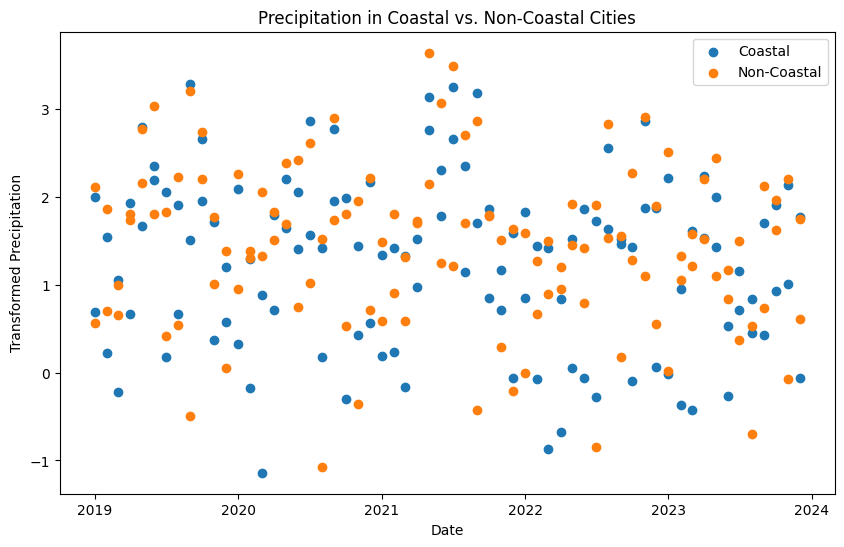

In [34]:
# Example setup - replace this with my actual transformed data
data = {
    'City': ['Aransas', 'Galveston', 'Houston', 'Dallas'],
    'Transformation': ['log', 'sqrt', 'sqrt', 'log'],
    'Coastal': [True, True, False, False],
    'Precipitation': [precp_aransas['ppt_in'], precp_glaveston['ppt_in'], precp_houston['ppt_in'], precp_dallas['ppt_in']]
}

# Create a DataFrame
df_list = []
for city_info in zip(data['City'], data['Transformation'], data['Coastal'], data['Precipitation']):
    city, transformation, is_coastal, precipitation = city_info
    temp_df = pd.DataFrame(precipitation)
    temp_df['City'] = city
    temp_df['Coastal'] = 'Coastal' if is_coastal else 'Non-Coastal'
    temp_df['Transformed Precipitation'] = np.log(temp_df['ppt_in'] + 0.01) if transformation == 'log' else np.sqrt(temp_df['ppt_in'])
    df_list.append(temp_df)

combined_df = pd.concat(df_list)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
for key, grp in combined_df.groupby(['Coastal']):
    ax.scatter(grp.index, grp['Transformed Precipitation'], label=key)

ax.set_title('Precipitation in Coastal vs. Non-Coastal Cities')
ax.set_xlabel('Date')
ax.set_ylabel('Transformed Precipitation')
ax.legend()

plt.show()


**Data Distribution:** The distribution of precipitation over time is scattered for both coastal and non-coastal cities. There doesn't appear to be a clear trend in precipitation over the years for either group.

**Variability:** Both coastal and non-coastal cities exhibit variability in precipitation. There are points spread out across the y-axis, suggesting variation in precipitation amounts.

**Comparative View:** At a glance, the plot does not show a consistent pattern indicating that one group consistently has higher or lower precipitation than the other. Both groups have data points across the range of the y-axis.

**Transformed Values:** The precipitation data has been transformed (likely to meet normality assumptions for statistical testing), so the values on the y-axis represent transformed precipitation. The actual precipitation amounts would need to be back-transformed to interpret them in their original units.

**Statistical Significance:** While the scatter plot provides a visual comparison, it does not tell us whether the differences between coastal and non-coastal cities are statistically significant. For that, we would need to refer back to the statistical tests (like the t-test or ANOVA) performed on the data.

In summary, the scatter plot shows the **variation** and **overlap** in precipitation between coastal and non-coastal cities, but it **does not** provide **conclusive evidence** to support or reject the hypothesis that coastal cities receive more precipitation than non-coastal cities.